<a href="https://colab.research.google.com/github/victoraccete/brazilian-teams-revenues/blob/main/Brazilian_teams_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import re

In [18]:
URL = 'https://raw.githubusercontent.com/victoraccete/brazilian-teams-revenues/main/dataset/2007-2019.csv'
def load_data(URL):
    df = pd.read_csv(URL)
    df = df.drop(columns=['Posição', 'Deficit ou Superavit'])
    return df
df = load_data(URL)
df

,Clube,Estado,Faturamento,Ano
0,Flamengo,Rio de Janeiro,"R$ 950,0 Milhões[1]",2019
1,Palmeiras,São Paulo,"R$ 665,5 Milhões[2]",2019
2,Grêmio,Rio Grande do Sul,"R$ 459,3 Milhões[3]",2019
3,Internacional,Rio Grande do Sul,"R$ 441,0 Milhões[4]",2019
4,Corinthians,São Paulo,"R$ 425,7 Milhões[5]",2019
...,...,...,...,...
151,Atlético Mineiro,Minas Gerais,"R$ 58,3 Milhões[114][116]",2007
152,Santos,São Paulo,"R$ 53,1 Milhões[114][115][116]",2007
153,Vasco,Rio de Janeiro,"R$ 51,0 Milhões[114][116]",2007
154,Botafogo,Rio de Janeiro,"R$ 41,1 Milhões[114]",2007


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clube        156 non-null    object
 1   Estado       156 non-null    object
 2   Faturamento  156 non-null    object
 3   Ano          156 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ KB


In [20]:
df['Clube'].value_counts()

Santos              13
Grêmio              13
Corinthians         13
Atlético Mineiro    13
Flamengo            13
Fluminense          13
Internacional       13
Palmeiras           13
Vasco               13
São Paulo           13
Cruzeiro            13
Botafogo            13
Name: Clube, dtype: int64

In [21]:
df.Ano = pd.to_datetime(df.Ano, format="%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Clube        156 non-null    object        
 1   Estado       156 non-null    object        
 2   Faturamento  156 non-null    object        
 3   Ano          156 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 5.0+ KB


In [22]:
def clean_currency(t: str) -> str:
    t = re.sub("\[.*\]", "", t) # removes any value between [ and ].
    t = re.sub('.?[a-zA-Z].?', "", t) # removing letters from end and beginning
    t = t.strip().replace(',', '.') # removes whitespace and replaces comma
    return t

t = "R$ 51,0 Milhões[114][116]"
assert clean_currency(t) == '51.0'

In [23]:
def fix_currency_col(series):
    """gets a messy column and make it a float column"""
    # using lambda to pass the value from the series as argumento to clean_currency
    series = series.apply(lambda x: clean_currency(x))
    return series.astype('float')

df['Faturamento'] = fix_currency_col(df['Faturamento'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Clube        156 non-null    object        
 1   Estado       156 non-null    object        
 2   Faturamento  156 non-null    float64       
 3   Ano          156 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.0+ KB


In [24]:
df.head()

,Clube,Estado,Faturamento,Ano
0,Flamengo,Rio de Janeiro,950.0,2019-01-01
1,Palmeiras,São Paulo,665.5,2019-01-01
2,Grêmio,Rio Grande do Sul,459.3,2019-01-01
3,Internacional,Rio Grande do Sul,441.0,2019-01-01
4,Corinthians,São Paulo,425.7,2019-01-01


### Questão de pesquisa:
Como as receitas do Flamengo se comparam com as receitas dos demais 3 grandes clubes do Rio de Janeiro ao longo dos anos?

In [25]:
rj_df = df[df.Estado == 'Rio de Janeiro']
rj_df.head(4)

,Clube,Estado,Faturamento,Ano
0,Flamengo,Rio de Janeiro,950.0,2019-01-01
9,Fluminense,Rio de Janeiro,265.2,2019-01-01
10,Vasco,Rio de Janeiro,215.3,2019-01-01
11,Botafogo,Rio de Janeiro,191.3,2019-01-01


In [26]:
flamengo = rj_df[rj_df.Clube == 'Flamengo']
flamengo.head()

,Clube,Estado,Faturamento,Ano
0,Flamengo,Rio de Janeiro,950.0,2019-01-01
13,Flamengo,Rio de Janeiro,543.0,2018-01-01
24,Flamengo,Rio de Janeiro,648.7,2017-01-01
36,Flamengo,Rio de Janeiro,510.0,2016-01-01
49,Flamengo,Rio de Janeiro,356.2,2015-01-01


In [27]:
''' Solution inspired by:
https://stackoverflow.com/questions/54742352/pandas-aggregate-data-other-than-a-specific-value-in-specific-column
but not quite '''
# the next two lines are used to filter all the clubs which are not Flamengo
mask = rj_df['Clube'] == 'Flamengo'
others = rj_df[~mask]
others = others.groupby('Ano', as_index=False).agg({'Faturamento': 'sum'})
others['Clube'] = "Outros 3 juntos"
others['Estado'] = 'Rio de Janeiro'
others

,Ano,Faturamento,Clube,Estado
0,2007-01-01,131.4,Outros 3 juntos,Rio de Janeiro
1,2008-01-01,169.9,Outros 3 juntos,Rio de Janeiro
2,2009-01-01,191.8,Outros 3 juntos,Rio de Janeiro
3,2010-01-01,212.9,Outros 3 juntos,Rio de Janeiro
4,2011-01-01,276.2,Outros 3 juntos,Rio de Janeiro
5,2012-01-01,420.2,Outros 3 juntos,Rio de Janeiro
6,2013-01-01,438.9,Outros 3 juntos,Rio de Janeiro
7,2014-01-01,414.9,Outros 3 juntos,Rio de Janeiro
8,2015-01-01,483.8,Outros 3 juntos,Rio de Janeiro
9,2016-01-01,662.6,Outros 3 juntos,Rio de Janeiro


In [28]:
fla_x_others = flamengo.append(others)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

COLOR = 'dimgrey'
line_width = 3.0

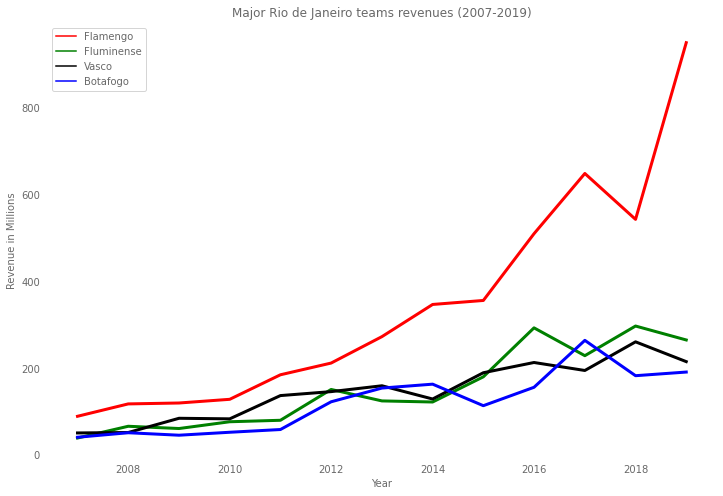

In [95]:
plt.figure(figsize=(12, 8))
g = sns.lineplot(data=rj_df, x='Ano', y='Faturamento', hue='Clube', palette=['red', 'green', 'black', 'blue'], linewidth=line_width)
plt.box(False)
plt.title("Major Rio de Janeiro teams revenues (2007-2019)", color=COLOR)
legend = plt.legend(title=None, loc='upper left')
plt.setp(legend.get_texts(), color=COLOR)
g.tick_params(left=False, bottom=False, colors=COLOR)
g.set_ylabel('Revenue in Millions', color=COLOR)
g.set_xlabel('Year', color=COLOR);

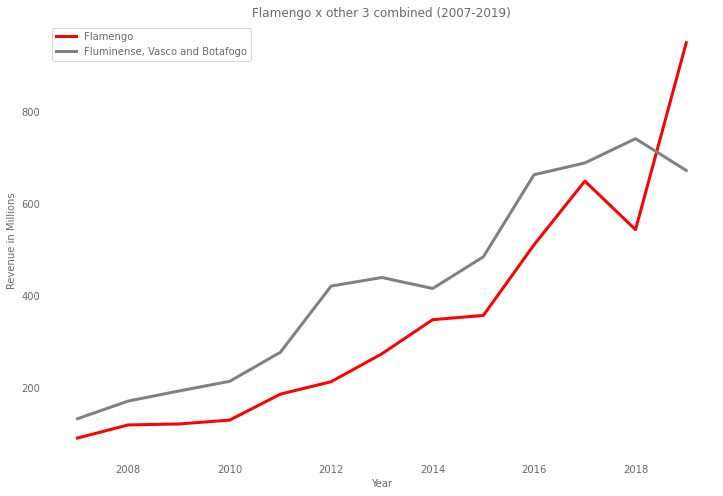

In [96]:
plt.figure(figsize=(12, 8))
g = sns.lineplot(data=fla_x_others, x='Ano', y='Faturamento', hue='Clube', palette=['red', 'grey'], linewidth=line_width)
plt.box(False)
plt.title("Flamengo x other 3 combined (2007-2019)", color=COLOR);
legend = plt.legend(title='', loc='upper left', labels=['Flamengo', 'Fluminense, Vasco and Botafogo']);
plt.setp(legend.get_texts(), color=COLOR)
g.tick_params(left=False, bottom=False, colors=COLOR)
g.set_ylabel('Revenue in Millions', color=COLOR)
g.set_xlabel('Year', color=COLOR);

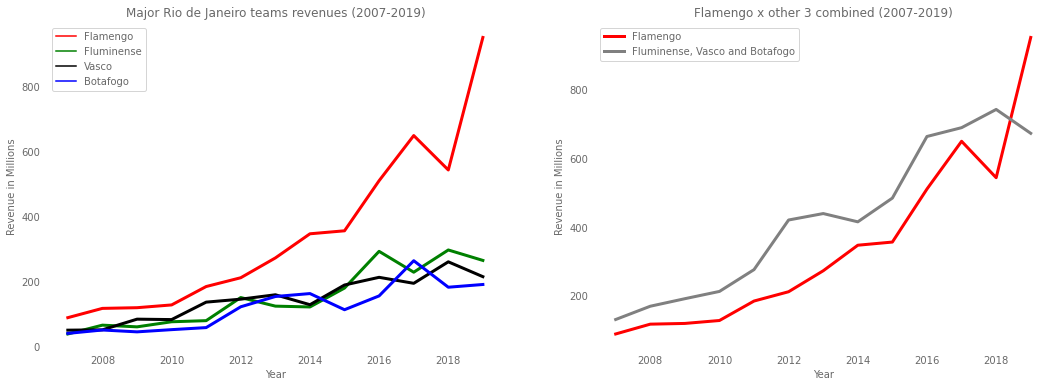

In [94]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
g = sns.lineplot(data=rj_df, x='Ano', y='Faturamento', hue='Clube', palette=['red', 'green', 'black', 'blue'], linewidth=line_width)
plt.box(False)
plt.title("Major Rio de Janeiro teams revenues (2007-2019)", color=COLOR)
legend = plt.legend(title=None, loc='upper left')
plt.setp(legend.get_texts(), color=COLOR)
g.tick_params(left=False, bottom=False, colors=COLOR)
g.set_ylabel('Revenue in Millions', color=COLOR)
g.set_xlabel('Year', color=COLOR);

plt.subplot(122)
g = sns.lineplot(data=fla_x_others, x='Ano', y='Faturamento', hue='Clube', palette=['red', 'grey'], linewidth=line_width)
plt.box(False)
plt.title("Flamengo x other 3 combined (2007-2019)", color=COLOR);
legend = plt.legend(title='', loc='upper left', labels=['Flamengo', 'Fluminense, Vasco and Botafogo']);
plt.setp(legend.get_texts(), color=COLOR)
g.tick_params(left=False, bottom=False, colors=COLOR)
g.set_ylabel('Revenue in Millions', color=COLOR)
g.set_xlabel('Year', color=COLOR);